<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Загрузка-данных" data-toc-modified-id="Шаг-1.-Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Загрузка данных</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Предобработка данных</a></span></li><li><span><a href="#Шаг-3.-Исследовательский-анализ-данных" data-toc-modified-id="Шаг-3.-Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Исследовательский анализ данных</a></span></li><li><span><a href="#Шаг-4.-Объединение-данных" data-toc-modified-id="Шаг-4.-Объединение-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Объединение данных</a></span></li><li><span><a href="#Шаг-5.-Подсчёт-выручки" data-toc-modified-id="Шаг-5.-Подсчёт-выручки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 5. Подсчёт выручки</a></span></li><li><span><a href="#Шаг-6.-Проверка-гипотез" data-toc-modified-id="Шаг-6.-Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Шаг 6. Проверка гипотез</a></span></li></ul></div>

# Анализ сервиса аренды самокатов GoFast

**Чтобы совершать поездки по городу, пользователи сервиса аренды самокатов GoFast пользуются мобильным приложением. Сервисом можно пользоваться:<br>
 _без подписки:_<br>
--абонентская плата отсутствует;<br>
--стоимость одной минуты поездки — 8 рублей;<br>
--стоимость старта (начала поездки) — 50 рублей;<br>
 _с подпиской Ultra:_<br>
--абонентская плата — 199 рублей в месяц;<br>
--стоимость одной минуты поездки — 6 рублей;<br>
--стоимость старта — бесплатно.**

**Нам предоставлены два датасета. В основных данных (users_go.csv) есть информация о пользователях, их поездках и подписках. Информация о поездках собрана в файле rides_go.csv. Информация о подписках пользователей - в subscriptions_go.csv.**

**Цель проекта: проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.**

**План работы: <br>
Сначала нам потребуется провести предобработку предоставленных нам данных, проверить на наличие пропусков и дубликатов, изменить тип данных где это необходимо. Затем мы произведем исследовательский анализ данных и ответим на вопросы:<br>
--О частоте встречаемости городов;<br>
--О соотношение пользователей с подпиской и без подписки;<br>
--О возрасте пользователей;<br>
--О среднем расстоянии, которое пользователь преодолел за одну поездку;<br>
--О продолжительности поездок.<br>
Затем нам предстоит объединить данные о пользователях, поездках и подписках в один датафрейм и создать еще два отдельных датафрейма с информацией о пользователях с подпиской и без нее и визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий.<br>
После этого мы рассчитаем помесячную выручку, которую принёс каждый пользователь.<br>
Далее мы по просьбе продакт-менеджеров сервиса перейдем к проверке следующих гипотез:<br>
--Тратят ли пользователи с подпиской больше времени на поездки?<br>
--Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров (так как это оптимальное расстояние с точки зрения износа самоката)?<br>
--Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?<br>
На заключительном этапе проекта мы построим графики распределений чтобы определить, какое минимальное количество промокодов нужно разослать для продления подписки как минимум сотней клиентов и предсказать, сколько клиентов из 1 млн откроют push-уведомления в мобильном приложении.**

#### Шаг 1. Загрузка данных

In [76]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import math

**Загрузим три предоставленных датасета для первичного ознакомления.**

In [77]:
absolute_path1 = r'C:\Users\ekate\OneDrive\Документы\Проекты по Анализу данных\Анализ сервиса аренды самокатов GoFast\users_go.csv'
users_go = pd.read_csv(absolute_path1)
users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [78]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [79]:
# Загрузка данных и преобразование столбца 'date' в datetime
absolute_path2 = r'C:\Users\ekate\OneDrive\Документы\Проекты по Анализу данных\Анализ сервиса аренды самокатов GoFast\rides_go.csv'
rides_go = pd.read_csv(absolute_path2, parse_dates=['date'])
rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [80]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [81]:
absolute_path3 = r'C:\Users\ekate\OneDrive\Документы\Проекты по Анализу данных\Анализ сервиса аренды самокатов GoFast\subscriptions_go.csv'
subscriptions_go = pd.read_csv(absolute_path3)
subscriptions_go

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [82]:
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


**Итак, перед нами 3 таблицы. В первой 1565 строк, во второй 18068 строк, в третьей - всего 2 строки. Пропущенных значений нет.**

#### Шаг 2. Предобработка данных

In [83]:
#создадим столбец 'month_number' с номерами месяцев
rides_go['month_number'] = rides_go['date'].dt.month
rides_go.head()

,user_id,distance,duration,date,month_number
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


**Посмотрим, за какой период работы сервиса аренды самокатов нам предоставлены данные.**

In [84]:
rides_go['date'].min()

Timestamp('2021-01-01 00:00:00')

In [85]:
rides_go['date'].max()

Timestamp('2021-12-30 00:00:00')

**Итак, в нашем датасете представлена информация за весь 2021 год.**

**Посмотрим, есть ли в исследуемых датасетах пропуски.**

In [86]:
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [87]:
rides_go.isna().sum()

user_id         0
distance        0
duration        0
date            0
month_number    0
dtype: int64

In [88]:
subscriptions_go.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Итак, мы установили, что пропусков в данных нет.**

**Теперь проверим данные на наличие дубликатов в тех столбцах, где по логике их быть не должно.**

In [89]:
users_go[users_go['user_id'].duplicated()]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [90]:
#удалим найденные дубликаты
users_go.drop_duplicates(subset='user_id', inplace=True)

In [91]:
users_go[users_go.duplicated(keep=False)]

,user_id,name,age,city,subscription_type


In [92]:
rides_go[rides_go.duplicated(keep=False)]

,user_id,distance,duration,date,month_number


**Итак, дубликаты найдены и удалены в таблице с пользователями. В датасете с информацией о поездках нет дубликатов. Таблицу с информацией о стоимости подписок можно не проверять, так как она совсем маленькая и на глаз видно, что с ней все в порядке.**

**Взглянем на выбросы в данных о продолжительности и дальности поездок.**

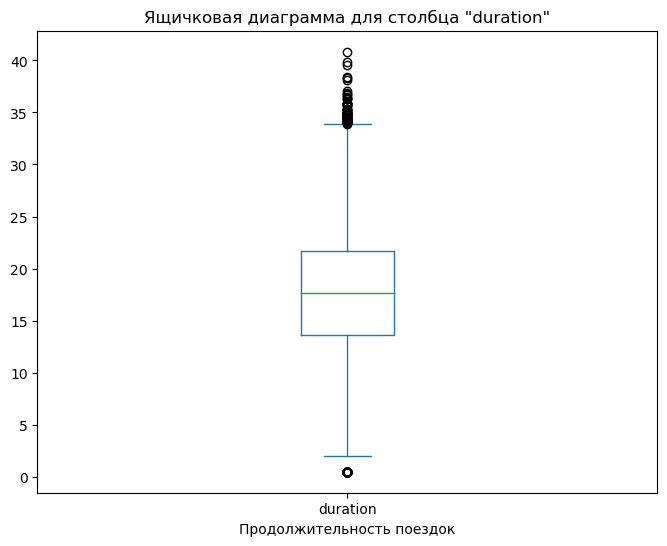

In [93]:
# Создадим ящичковую диаграмму для столбца 'duration':
plt.figure(figsize=(8, 6))
rides_go['duration'].plot(kind='box')
plt.title('Ящичковая диаграмма для столбца "duration"')
plt.xlabel('Продолжительность поездок')

# Отобразите график:
plt.show()

**Выходит, что в данных есть поездка с очень короткой продолжительностью и некоторое количество необычайно продолжительных для самокатов поездок более 35 минут.**

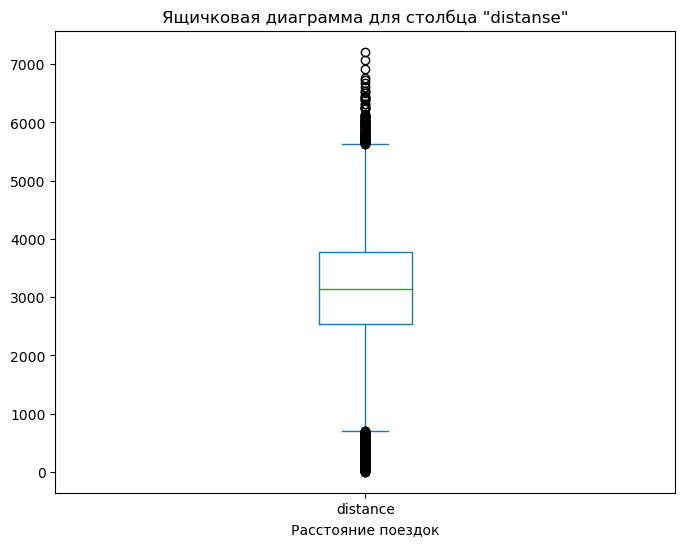

In [94]:
# Создадим ящичковую диаграмму для столбца 'distance':
plt.figure(figsize=(8, 6))
rides_go['distance'].plot(kind='box')
plt.title('Ящичковая диаграмма для столбца "distanse"')
plt.xlabel('Расстояние поездок')

# Отобразите график:
plt.show()

**Можно сделать вывод, что пользователи редко ездиют меньше 1 км, а также поездки более 6 км являются исключениями.**

#### Шаг 3. Исследовательский анализ данных

**3.1**

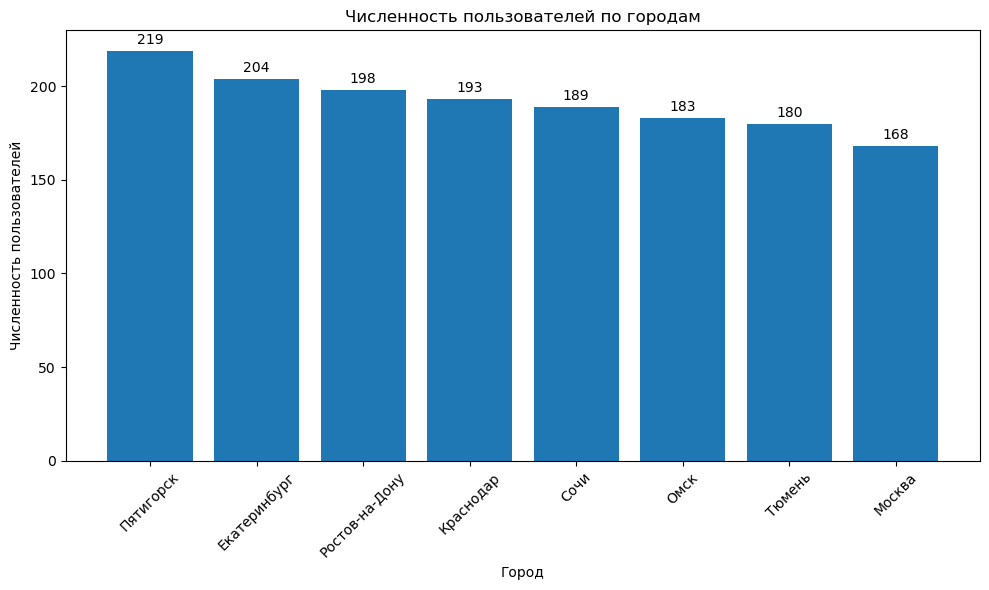

In [95]:
# Подсчет количества встречаний каждого города и сортировка
city_counts = users_go['city'].value_counts()
city_counts_sorted = city_counts.sort_values(ascending=False)

# Создание гистограммы
plt.figure(figsize=(10, 6))
bars = plt.bar(city_counts_sorted.index, city_counts_sorted.values)

# Установка угла поворота подписей оси x
plt.xticks(rotation=45)

# Добавление численности пользователей над столбцами
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # Смещение текста над столбцами
                 textcoords='offset points',
                 ha='center', va='bottom')

# Отображение гистограммы
plt.xlabel('Город')
plt.ylabel('Численность пользователей')
plt.title('Численность пользователей по городам')
plt.tight_layout()
plt.show()

**Итак, на основе полученной столбчатой диаграммы мы можем сделать вывод, что больше всего пользователей из Пятигорска, Екатеринбурга, Ростова-на-Дону, а меньше всего из Москвы. Но разрыв в принципе небольшой.**

**3.2**

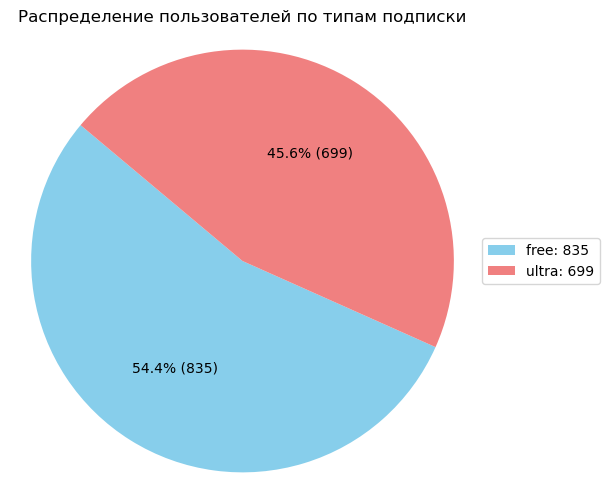

In [96]:
# Подсчет количества пользователей для каждого типа подписки
subscription_counts = users_go['subscription_type'].value_counts()

# Определите цвета для каждого сегмента
colors = ['skyblue', 'lightcoral']

# Создание круговой диаграммы с указанием цветов
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    subscription_counts,
    labels=None,  # Убираем подписи изнутри диаграммы
    autopct=lambda p: f'{p:.1f}% ({int(p * len(users_go) / 100)})',
    startangle=140,
    colors=colors  # Указываем цвета для сегментов
)

# Добавление подписей снаружи диаграммы
labels = [f'{label}: {count}' for label, count in subscription_counts.items()]
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Распределение пользователей по типам подписки')
plt.axis('equal')  # Чтобы круговая диаграмма была круглой

# Отображение диаграммы
plt.show()

**Мы установили, что у 54.4% пользователей (835 человек) бесплатная подписка, а 45.6% пользователей пользуются платной подпиской (699 человек).**

**3.3**

In [97]:
#посмотрим, какие возраста пользователей встречаются для разбивки их на сегменты
users_go['age'].unique()

array([22, 31, 20, 26, 28, 25, 23, 21, 18, 27, 24, 29, 32, 14, 19, 30, 17,
       12, 35, 33, 13, 15, 37, 16, 34, 38, 36, 39, 43], dtype=int64)

In [98]:
# Создание функции для определения категории возраста
def categorize_age(age):
    if age < 20:
        return "До 20 лет"
    elif 20 <= age < 30:
        return "От 20 до 30 лет"
    elif 30 <= age < 40:
        return "От 30 до 40 лет"
    else:
        return "От 40 лет и старше"

# Применение функции к столбцу 'age' и создание нового столбца 'age_category'
users_go['age_category'] = users_go['age'].apply(categorize_age)

In [99]:
users_go['age_category'].value_counts()

От 20 до 30 лет       1119
От 30 до 40 лет        242
До 20 лет              172
От 40 лет и старше       1
Name: age_category, dtype: int64

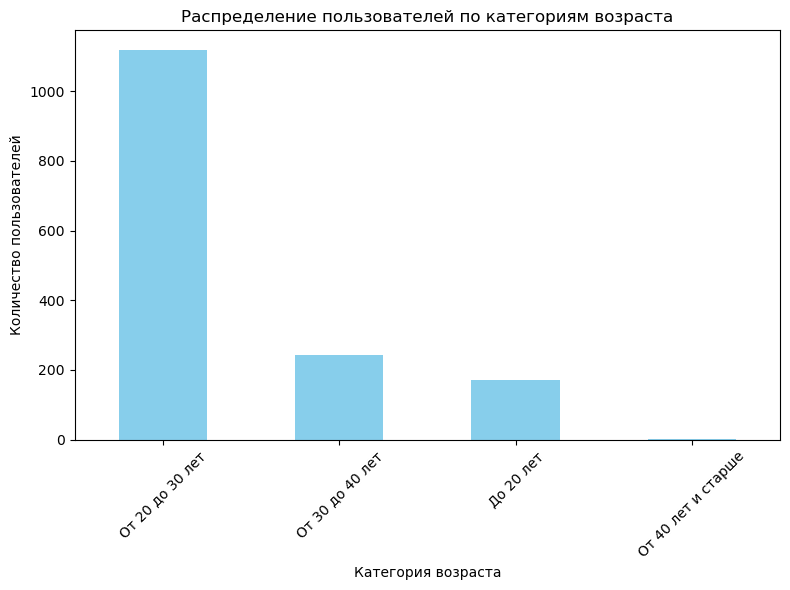

In [100]:
# Создание столбчатой диаграммы на основе распределения категорий возраста
age_category_counts = users_go['age_category'].value_counts()
plt.figure(figsize=(8, 6))
age_category_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение пользователей по категориям возраста')
plt.xlabel('Категория возраста')
plt.ylabel('Количество пользователей')

# Отображение диаграммы
plt.xticks(rotation=45)  # Поворот подписей на оси x для лучшей читаемости
plt.tight_layout()
plt.show()

**На диаграмме наглядно видно, что преобладающее большинство пользователей арендованными самокатами - это молодые люди в возрасте от 20 до 30 лет, люди старше 40 лет ими практически не пользуются.**

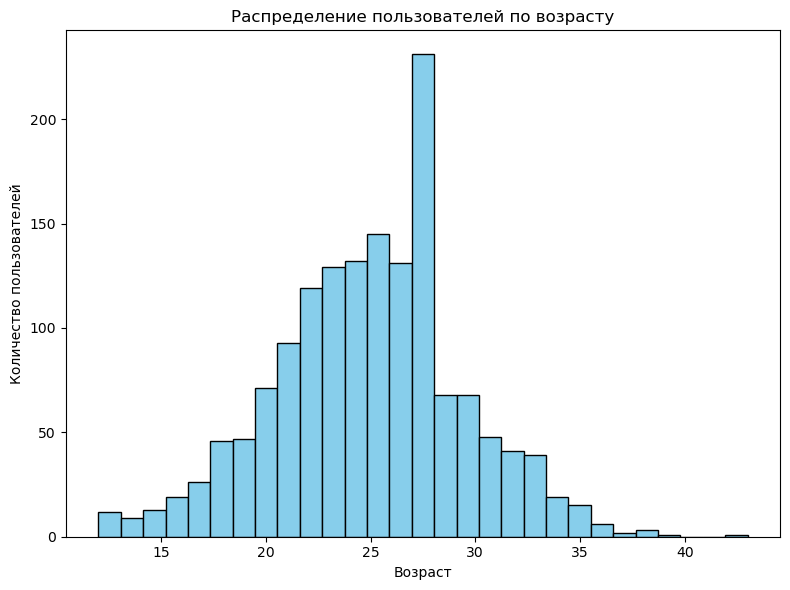

In [101]:
# Создание гистограммы на основе распределения категорий возраста
age_category_counts = users_go['age'].value_counts()
plt.figure(figsize=(8, 6))
plt.hist(age_category_counts.index, bins=len(age_category_counts),
         weights=age_category_counts.values, color='skyblue', edgecolor='black')
plt.title('Распределение пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

# Отображение гистограммы
plt.tight_layout()
plt.show()

**По гистограмме можно уверенно сделать вывод, что больше всего пользователей - это люди в возрасте между 25 и 30 годами. Еще приличное количество пользователей в возрасте от 20 до 25 лет.**

**3.4**

In [102]:
rides_go['distance'].min()

0.855682925681208

In [103]:
rides_go['distance'].max()

7211.007744598519

**Итак, минимум пользователь проехал меньше метра, максимум - более 7 км.**

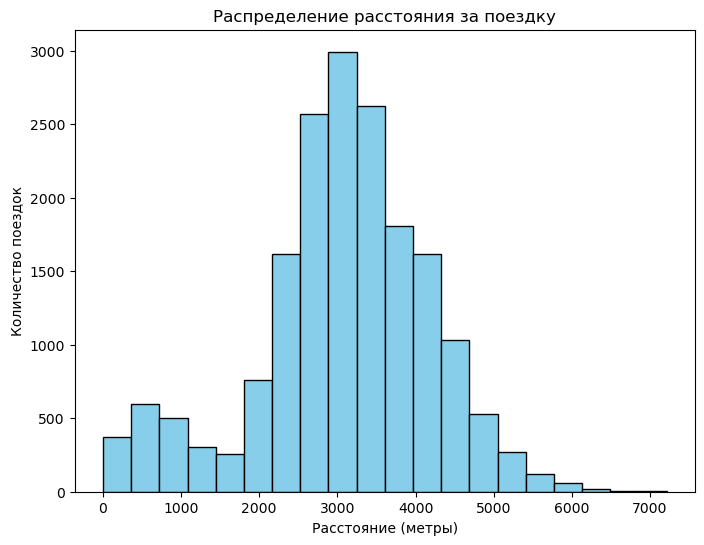

In [104]:
plt.figure(figsize=(8, 6))
plt.hist(rides_go['distance'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение расстояния за поездку')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Количество поездок')
plt.show()

**Теперь мы можем утверждать, что большинство поездок было в районе 3 км. Поездки меньше 2 км и дальше 5 км - редкость.**

**3.5**

In [105]:
rides_go['duration'].min()

0.5

In [106]:
rides_go['duration'].max()

40.82396261922424

**Самая короткая поездка составила всего полминуты, а самая продолжительная - больше 40 мин.**

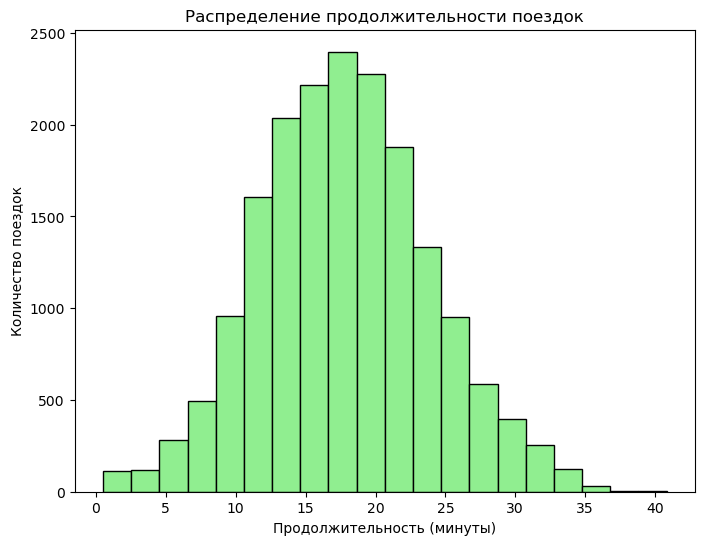

In [107]:
plt.figure(figsize=(8, 6))
plt.hist(rides_go['duration'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')
plt.show()

**Чаще всего самокат используется в районе 15-20 мин, для поездок на 10 мин или более 20 мин самокаты берут в аренду реже.**

**В разделе исследовательского анализа данных мы уже строили диаграммы размаха по продолжительности и дальности поездок. Построим еще одну диаграмму по возрасту пользователей.**

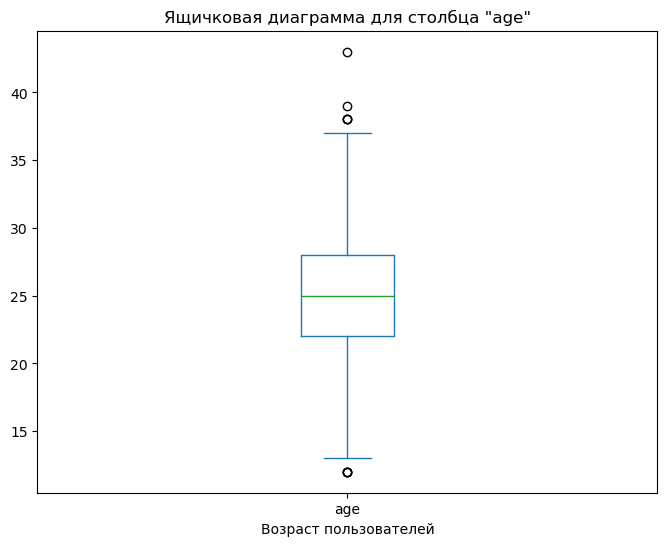

In [108]:
# Создадим ящичковую диаграмму для столбца 'age':
plt.figure(figsize=(8, 6))
users_go['age'].plot(kind='box')
plt.title('Ящичковая диаграмма для столбца "age"')
plt.xlabel('Возраст пользователей')

# Отобразите график:
plt.show()

**Итак, мало какие пользователи моложе 15 лет, также люди старше 35 лет тоже редко пользуются услугами аренды самокатов.**

**Менеджерам сервиса стоит рекомендовать ориентироваться преимущественно на людей 23 - 28 лет. Также среднестатистический пользователь обычно использует самокат в промежутке от 14 до 23 мин, проезжая на нем приблизительное расстояние от 2.5 до 3.8 км.**

#### Шаг 4. Объединение данных

In [109]:
#объединим три датафрейма в одну таблицу
df = users_go.merge(rides_go, how='left', on='user_id')
df = df.merge(subscriptions_go, how='left', on='subscription_type')
df.head()

,user_id,name,age,city,subscription_type,age_category,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,От 20 до 30 лет,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,От 20 до 30 лет,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,От 20 до 30 лет,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,От 20 до 30 лет,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,От 20 до 30 лет,4028.687306,26.265803,2021-08-28,8,6,0,199


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   age_category       18068 non-null  object        
 6   distance           18068 non-null  float64       
 7   duration           18068 non-null  float64       
 8   date               18068 non-null  datetime64[ns]
 9   month_number       18068 non-null  int64         
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory 

**Итак, в результате объединения таблиц у нас получился датафрейм с 18068 строками, то есть это столько же, сколько у нас было в датафрейме rides_go, что соответствует логике и нашим задачам. Пропуски отсутствуют, как и в исходных датафреймах.**

In [111]:
#создадим датафрейм с пользователями с бесплатной подпиской
free = df[df['subscription_type'] == 'free']
free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   age_category       11568 non-null  object        
 6   distance           11568 non-null  float64       
 7   duration           11568 non-null  float64       
 8   date               11568 non-null  datetime64[ns]
 9   month_number       11568 non-null  int64         
 10  minute_price       11568 non-null  int64         
 11  start_ride_price   11568 non-null  int64         
 12  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memo

In [112]:
#создадим датафрейм с пользователями с платной подпиской
ultra = df[df['subscription_type'] == 'ultra']
ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   age_category       6500 non-null   object        
 6   distance           6500 non-null   float64       
 7   duration           6500 non-null   float64       
 8   date               6500 non-null   datetime64[ns]
 9   month_number       6500 non-null   int64         
 10  minute_price       6500 non-null   int64         
 11  start_ride_price   6500 non-null   int64         
 12  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory us

**Датафрейм free состоит из 11568 строк, а датафрейм ultra из 6500 строк, что в сумме дает 18068 строк, из которых состоит df, то есть все в порядке. Пользователей с подпиской почти в 2 раза меньше чем пользователей без подписки.**

**Теперь взглянем на распределение по протяженности поездки у пользователей без подписки и с ней.**

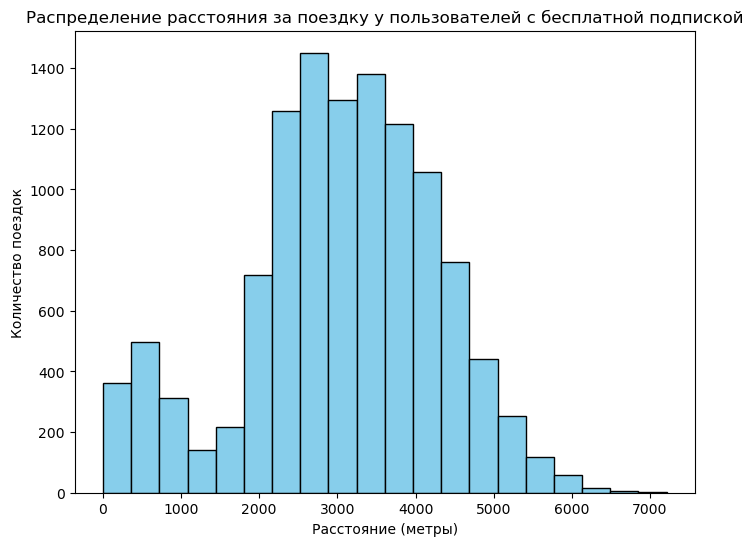

In [113]:
plt.figure(figsize=(8, 6))
plt.hist(free['distance'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение расстояния за поездку у пользователей с бесплатной подпиской')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Количество поездок')
plt.show()

In [114]:
free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

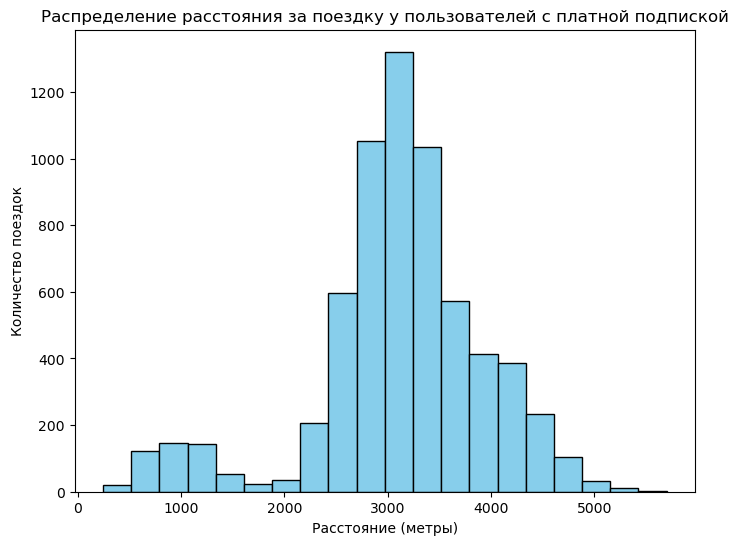

In [115]:
plt.figure(figsize=(8, 6))
plt.hist(ultra['distance'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение расстояния за поездку у пользователей с платной подпиской')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Количество поездок')
plt.show()

In [116]:
ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

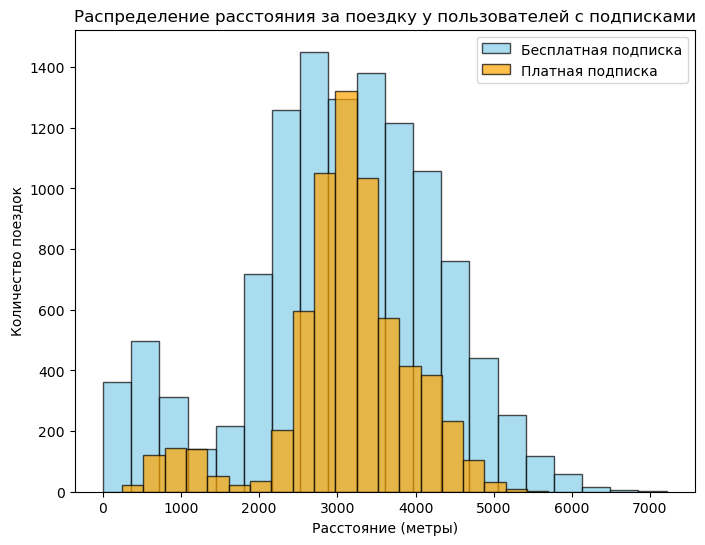

In [117]:
# Создадим новый график
plt.figure(figsize=(8, 6))

# Построим гистограмму для пользователей с бесплатной подпиской
plt.hist(free['distance'], bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='Бесплатная подписка')

# Построим гистограмму для пользователей с платной подпиской
plt.hist(ultra['distance'], bins=20, color='orange', edgecolor='black', alpha=0.7, label='Платная подписка')

# Добавим заголовок и метки осей
plt.title('Распределение расстояния за поездку у пользователей с подписками')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Количество поездок')

# Добавим легенду
plt.legend()

# Покажем график
plt.show()

**У пользователей с бесплатной подпиской распределение получилось более плавным, чаще всего поездки составляют порядка 2.5 - 4.5 км. У пользователей с платной подпиской получился более выделяющийся пик в районе более 3-х км, а чаще всего пользователи проезжают маршрут длиной в 2.5 - 3.5 км. Также можно отметить, что пользователи без подписки иногда проезжают больше 5 км, а у пользователей с подпиской такого практичесики не бывает.<br> 
С помощью метода describe() мы получили информацию, что медиана длины поездки у пользователей без подписки составляет 3115 м, а у пользователей с подпиской немного более - 3149 м.**

**Посмотрим на распределение по времени поездки у пользователей без подписки и с ней.**

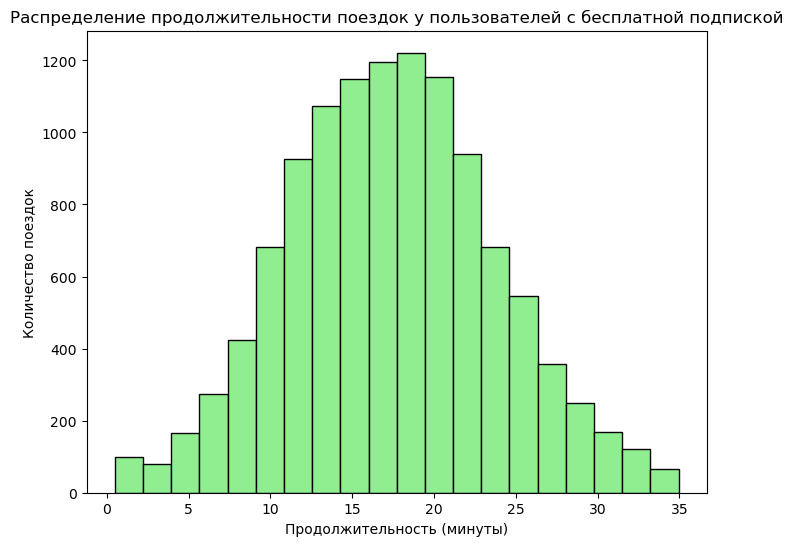

In [118]:
plt.figure(figsize=(8, 6))
plt.hist(free['duration'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Распределение продолжительности поездок у пользователей с бесплатной подпиской')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')
plt.show()

In [119]:
free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

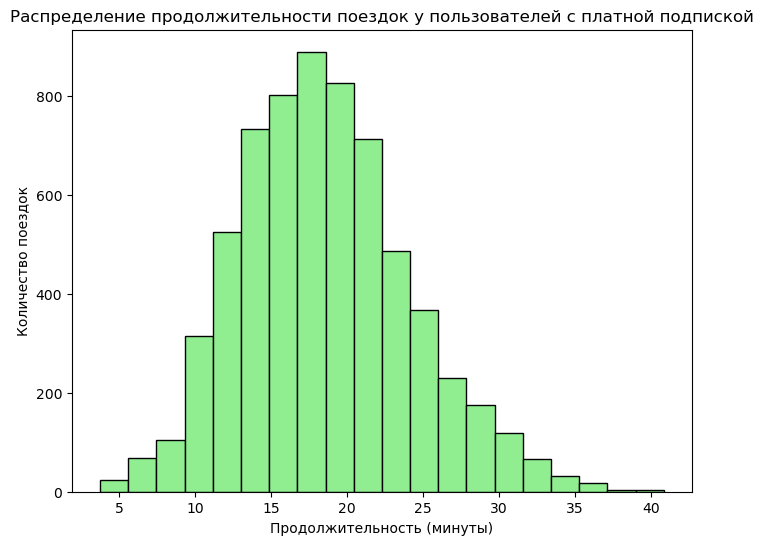

In [120]:
plt.figure(figsize=(8, 6))
plt.hist(ultra['duration'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Распределение продолжительности поездок у пользователей с платной подпиской')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')
plt.show()

In [121]:
ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

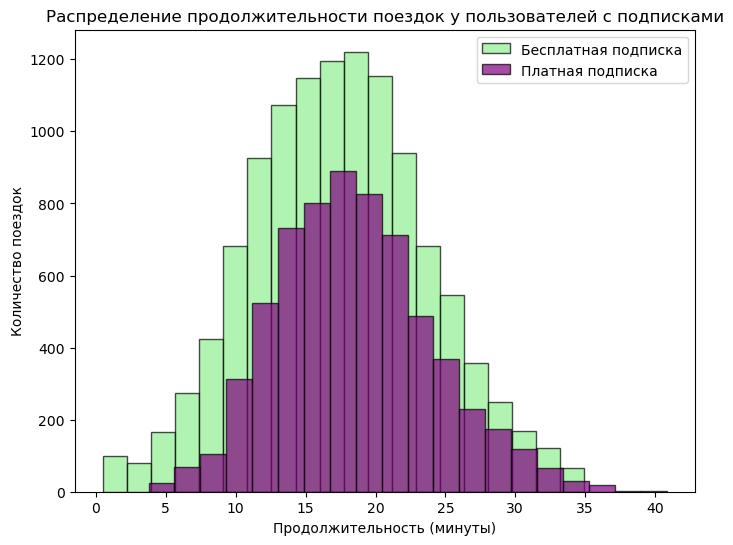

In [122]:
# Создадим новый график
plt.figure(figsize=(8, 6))

# Построим гистограмму для пользователей с бесплатной подпиской
plt.hist(free['duration'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7, label='Бесплатная подписка')

# Построим гистограмму для пользователей с платной подпиской
plt.hist(ultra['duration'], bins=20, color='purple', edgecolor='black', alpha=0.7, label='Платная подписка')

# Добавим заголовок и метки осей
plt.title('Распределение продолжительности поездок у пользователей с подписками')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')

# Добавим легенду
plt.legend()

# Покажем график
plt.show()

**Получается, что пользователи с бесплатной подпиской чаще всего пользуются самокатом от 10 до 25 мин, у пользователей с платной подпиской похожее распределение, но можно заметить отличие, что у пользователей с платной подпиской встречаются поездки дольше 35 мин в отличие от пользователей без подписки.<br>
С помощью метода describe() мы получили информацию, что медиана продолжительности поездки у пользователей без подписки составляет 17 мин, а у пользователей с подпиской больше на одну минуту - 18 м.**

#### Шаг 5. Подсчёт выручки

In [123]:
#округлим значения столбца 'duration'
df['duration'] = np.ceil(df['duration'])

In [124]:
#округлим значения столбца 'distance'
df['distance'] = df['distance'].round()
df.head()

,user_id,name,age,city,subscription_type,age_category,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,От 20 до 30 лет,4410.0,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,От 20 до 30 лет,2618.0,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,От 20 до 30 лет,754.0,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,От 20 до 30 лет,2695.0,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,От 20 до 30 лет,4029.0,27.0,2021-08-28,8,6,0,199


**Создадим новый датафрейм profiles с агрегированными данными о поездках.**

In [125]:
df_aggregated = (df.groupby(['user_id', 'month_number'] )
                 .agg({'distance':'sum', 'duration':['sum', 'count'], 
                       'start_ride_price': 'max', 'minute_price':'max', 'subscription_fee': 'max'}))
df_aggregated

distance duration       start_ride_price minute_price  \
                          sum      sum count              max          max   
user_id month_number                                                         
1       1              7028.0     42.0     2                0            6   
        4               754.0      7.0     1                0            6   
        8              6724.0     46.0     2                0            6   
        10             5810.0     32.0     2                0            6   
        11             7004.0     56.0     3                0            6   
...                       ...      ...   ...              ...          ...   
1534    6              3409.0     26.0     2               50            8   
        8              7623.0     48.0     2               50            8   
        9              4928.0     23.0     1               50            8   
        11            13349.0     78.0     4               50            8   
        12             2372.0     16.0     1               50            8   

                     subscription_fee  
                                  max  
user_id month_number                   
1       1                         199  
        4                         199  
        8                         199  
        10                        199  
        11                        199  
...                               ...  
1534    6                           0  
        8                           0  
        9                           0  
        11                          0  
        12                          0  

[11331 rows x 6 columns]

In [126]:
# Сбросим уровни индекса столбцов
df_aggregated.columns = df_aggregated.columns.droplevel()

# Переименуем столбцы
df_aggregated.columns = [
    'total_distance',
    'total_duration',
    'total_trips',
    'start_ride_price',
    'minute_price',
    'subscription_fee'
]

# Теперь DataFrame df_aggregated будет иметь одноуровневые названия столбцов
df_aggregated

total_distance  total_duration  total_trips  \
user_id month_number                                                
1       1                     7028.0            42.0            2   
        4                      754.0             7.0            1   
        8                     6724.0            46.0            2   
        10                    5810.0            32.0            2   
        11                    7004.0            56.0            3   
...                              ...             ...          ...   
1534    6                     3409.0            26.0            2   
        8                     7623.0            48.0            2   
        9                     4928.0            23.0            1   
        11                   13349.0            78.0            4   
        12                    2372.0            16.0            1   

                      start_ride_price  minute_price  subscription_fee  
user_id month_number                                                    
1       1                            0             6               199  
        4                            0             6               199  
        8                            0             6               199  
        10                           0             6               199  
        11                           0             6               199  
...                                ...           ...               ...  
1534    6                           50             8                 0  
        8                           50             8                 0  
        9                           50             8                 0  
        11                          50             8                 0  
        12                          50             8                 0  

[11331 rows x 6 columns]

In [127]:
#проверим полученный датафрейм на наличие пропусков
df_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (1534, 12)
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_distance    11331 non-null  float64
 1   total_duration    11331 non-null  float64
 2   total_trips       11331 non-null  int64  
 3   start_ride_price  11331 non-null  int64  
 4   minute_price      11331 non-null  int64  
 5   subscription_fee  11331 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 576.5 KB


In [128]:
# добавляем столбец с ежемесячной выручкой по каждому пользователю
df_aggregated['monthly_revenue'] = (
    df_aggregated['start_ride_price'] * df_aggregated['total_trips'] +
    df_aggregated['minute_price'] * df_aggregated['total_duration'] +
    df_aggregated['subscription_fee']
)
df_aggregated.head(15)

total_distance  total_duration  total_trips  \
user_id month_number                                                
1       1                     7028.0            42.0            2   
        4                      754.0             7.0            1   
        8                     6724.0            46.0            2   
        10                    5810.0            32.0            2   
        11                    7004.0            56.0            3   
        12                    6752.0            28.0            2   
2       3                    10188.0            63.0            3   
        4                     6165.0            40.0            2   
        6                     3255.0            14.0            1   
        7                     6781.0            48.0            2   
        8                      923.0             7.0            1   
        10                    2825.0            19.0            1   
        12                    3828.0            12.0            1   
3       1                     3062.0            13.0            1   
        2                     5421.0            39.0            2   

                      start_ride_price  minute_price  subscription_fee  \
user_id month_number                                                     
1       1                            0             6               199   
        4                            0             6               199   
        8                            0             6               199   
        10                           0             6               199   
        11                           0             6               199   
        12                           0             6               199   
2       3                            0             6               199   
        4                            0             6               199   
        6                            0             6               199   
        7                            0             6               199   
        8                            0             6               199   
        10                           0             6               199   
        12                           0             6               199   
3       1                            0             6               199   
        2                            0             6               199   

                      monthly_revenue  
user_id month_number                   
1       1                       451.0  
        4                       241.0  
        8                       475.0  
        10                      391.0  
        11                      535.0  
        12                      367.0  
2       3                       577.0  
        4                       439.0  
        6                       283.0  
        7                       487.0  
        8                       241.0  
        10                      313.0  
        12                      271.0  
3       1                       277.0  
        2                       433.0

**Теперь у нас есть информация о выручке, которую принес компании каждый пользователь за каждый месяц.**

In [129]:
df_aggregated['monthly_revenue'].sum()

3878641.0

#### Шаг 6. Проверка гипотез

**6.1. Сформулируем гипотезы:<br>
Нулевая гипотеза (H0): Средняя продолжительность поездок для пользователей с подпиской равна средней продолжительности поездок для пользователей без подписки.<br>
Альтернативная гипотеза (H1): Средняя продолжительность поездок для пользователей с подпиской не равна средней продолжительности поездок для пользователей без подписки.**

In [130]:
duration_subscribers = ultra['duration']
duration_non_subscribers = free['duration']
# Уровень значимости
alpha = 0.05

# Выполнение t-теста
t_statistic, p_value = st.ttest_ind(duration_subscribers, duration_non_subscribers)

# Вывод результатов
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимая разница в продолжительности поездок.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимой разницы в продолжительности поездок.")
f"Значение p-value: {p_value:.10f}"

Отвергаем нулевую гипотезу: есть статистически значимая разница в продолжительности поездок.


'Значение p-value: 0.0000000000'

**На основе t-теста получается, что есть статистически значимая разница в средних продолжительностях поездок между двумя группами. Это может указывать на то, что пользователи с подпиской действительно тратят больше времени на поездки. Проверим, так ли это, сравнив средние значения продолжительности поездок в обеих группах.**

In [131]:
mean_duration_subscribers = ultra['duration'].mean()
mean_duration_non_subscribers = free['duration'].mean()

if mean_duration_subscribers > mean_duration_non_subscribers:
    print(f"Пользователи с подпиской тратят в среднем больше времени на поездки.")
    print(f"Средняя продолжительность поездок для пользователей с подпиской: {mean_duration_subscribers:.2f}")
    print(f"Средняя продолжительность поездок для пользователей без подписки: {mean_duration_non_subscribers:.2f}")
elif mean_duration_subscribers < mean_duration_non_subscribers:
    print(f"Пользователи с подпиской тратят в среднем меньше времени на поездки.")
    print(f"Средняя продолжительность поездок для пользователей с подпиской: {mean_duration_subscribers:.2f}")
    print(f"Средняя продолжительность поездок для пользователей без подписки: {mean_duration_non_subscribers:.2f}")
else:
    print("Средняя продолжительность поездок одинакова для обеих групп.")

Пользователи с подпиской тратят в среднем больше времени на поездки.
Средняя продолжительность поездок для пользователей с подпиской: 18.54
Средняя продолжительность поездок для пользователей без подписки: 17.39


**Итак, мы установили, что пользователи с подпиской в среднем тратят больше времени на поездки и, как следствие, могут быть «выгоднее» для компании.<br> Для компании это означает, что команде сервиса GoFast стоит работать в направлении склонить как можно больше пользователей купить платную подписку чтобы увеличить свою выручку.**

**6.2. Сформулируем гипотезы:<br>
Нулевая гипотеза (H0): Среднее расстояние для пользователей с подпиской не превышает 3130 метров.<br>
Альтернативная гипотеза (H1): Среднее расстояние для пользователей с подпиской больше 3130 метров.**

In [132]:
# Данные о расстоянии для пользователей с подпиской
distance_subscribers = ultra['distance']

# Уровень значимости
alpha = 0.05

# Значение для сравнения (в данном случае, 3130 метров)
comparison_value = 3130

# Выполнение одностороннего t-теста
t_statistic, p_value = st.ttest_1samp(distance_subscribers, comparison_value, alternative='greater')

# Вывод значения p-value
print(f"Значение p-value: {p_value:.10f}")

# Вывод результатов
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: среднее расстояние для пользователей с подпиской превышает 3130 метров.")
else:
    print("Не отвергаем нулевую гипотезу: среднее расстояние для пользователей с подпиской не превышает 3130 метров.")

Значение p-value: 0.9195368848
Не отвергаем нулевую гипотезу: среднее расстояние для пользователей с подпиской не превышает 3130 метров.


**На основе результатов одностороннего t-теста нет достаточных статистических доказательств для того, чтобы утверждать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.<br>
p-значение = 0.9195368848 означает, что вероятность получить наблюдаемые данные при условии, что нулевая гипотеза верна, составляет 0.9195, что довольно высоко.<br>
Для компании такие результаты теста говорят о том, что в целом ее команде не стоит переживать о сильном износе самокатов, так как поездки с продолжительностью более 3130 м бывают нечасто, т.е. срок службы самокатов от неправильной эксплуатации не уменьшится, а как следствие не придется менять самокаты на новые раньше их заявленного производителем срока службы и терять показатели выручки из-за трат на покупку новых самокатов.**

**6.3. Сформулируем гипотезы:<br>
Нулевая гипотеза (H0) будет утверждать, что средние значения выручки одинаковы для обеих групп, а альтернативная гипотеза (H1) будет утверждать, что средняя выручка от пользователей с подпиской выше средней выручки от пользователей без подписки.**

In [133]:
# Выборка данных о выручке для пользователей с подпиской
revenue_subscribers = df_aggregated[df_aggregated['subscription_fee'] == 199]['monthly_revenue']

# Выборка данных о выручке для пользователей без подписки
revenue_non_subscribers = df_aggregated[df_aggregated['subscription_fee'] == 0]['monthly_revenue']

# Уровень значимости
alpha = 0.05

# Выполнение t-теста
t_statistic, p_value = st.ttest_ind(revenue_subscribers, revenue_non_subscribers)

# Вывод значения p-value
print(f"Значение p-value: {p_value:.10f}")

# Вывод результатов
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средняя помесячная выручка от пользователей с подпиской выше средней выручки от пользователей без подписки.")
else:
    print("Не отвергаем нулевую гипотезу: средняя помесячная выручка одинакова для обеих групп.")

Значение p-value: 0.0000000000
Отвергаем нулевую гипотезу: средняя помесячная выручка от пользователей с подпиской выше средней выручки от пользователей без подписки.


**Исходя из результатов t-теста можно сделать вывод, что средняя помесячная выручка от пользователей с подпиской статистически значимо выше, чем средняя выручка от пользователей без подписки. Это говорит о том, что пользователи с подпиской приносят больше выручки по месяцам для компании GoFast, чем пользователи без подписки, то есть мы еще раз убеждаемся, что команде GoFast нужно работать над увеличением аудитории пользователей с подпиской.**

**Удостоверимся в этом, взглянув на средние значения.**

In [134]:
revenue_subscribers.mean()

362.7921906022502

In [135]:
revenue_non_subscribers.mean()

328.6413651073845

**6.4. Теперь представим такую ситуацию:<br> техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.<br>
Для проверки гипотезы о том, что обновление серверов значимо снизило количество обращений в техподдержку, можно использовать t-тест для сравнения средних значений двух наборов данных: количество обращений до обновления и количество обращений после обновления. Это позволит нам определить, есть ли статистически значимая разница между двумя периодами.<br>
В такой ситуации может потребоваться выполнить парный t-тест (paired t-test), так как у нас есть две выборки, которые связаны между собой (количество обращений от одних и тех же пользователей до и после обновления). Парный t-тест позволит определить, есть ли статистически значимая разница между связанными данными.<br>
Наши гипотезы могут быть сформулированы следующим образом:<br>
Нулевая гипотеза (H0): Среднее количество обращений до обновления равно среднему количеству обращений после обновления. Или другими словами, обновление серверов не повлияло на количество обращений.<br>
Альтернативная гипотеза (H1): Среднее количество обращений до обновления не равно среднему количеству обращений после обновления. Или, что более конкретно, обновление серверов повлияло на количество обращений (больше или меньше).<br>
Выполнив парный t-тест с использованием конкретных данных, мы сможем определить, есть ли статистически значимая разница между средним количеством обращений до и после обновления. Если p-value будет меньше заданного уровня значимости, то можно будет сделать вывод о статистической значимости разницы.**

**Общий вывод: <br>
Итак, нами были проанализированы данные по использованию сервиса аренды самокатов GoFast. Сначала мы провели предобработку данных: изменили типы столбцов, проверили данные на наличие пропусков и дубликатов и избавились от них, добавили дополнительные столбцы, необходимые нам для анализа. Затем мы провели исследовательский анализ данных и установили:<br>
--Больше всего пользователей сервисом из Пятигорска, Екатеринбурга, Ростова-на-Дону, а меньше всего из Москвы. Но разрыв в принципе небольшой.<br>
--У 54.4% пользователей (835 человек) бесплатная подписка, а 45.6% пользователей пользуются платной подпиской (699 человек).<br>
--Преобладающее большинство пользователей арендованными самокатами - это молодые люди в возрасте от 20 до 30 лет, люди старше 40 лет ими практически не пользуются.<br>
--Большинство поездок было в районе 3 км. Поездки меньше 2 км и дальше 5 км - редкость.<br>
--Чаще всего самокат используется в районе 15-20 мин, для поездок на 10 мин или более 20 мин самокаты берут в аренду реже.<br>
Затем мы произвели объединение данных в один датафрейм и изучили информацию о расстоянии и времени поездок для пользователей без подписки и с подпиской и визуализировали ее. Сделали такие выводы:<br>
--У пользователей с бесплатной подпиской распределение получилось более плавным, чаще всего поездки составляют порядка 2.5 - 4.5 км. У пользователей с платной подпиской получился более выделяющийся пик в районе более 3-х км, а чаще всего пользователи проезжают маршрут длиной в 2.5 - 3.5 км. Также можно отметить, что пользователи без подписки иногда проезжают больше 5 км, а у пользователей с подпиской такого практичесики не бывает.<br>
--Пользователи с бесплатной подпиской чаще всего пользуются самокатом от 10 до 25 мин, у пользователей с платной подпиской похожее распределение, но можно заметить отличие, что у пользователей с платной подпиской встречаются поездки дольше 35 мин в отличие от пользователей без подписки.<br>
Далее мы создали датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными и нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также мы рассчитали помесячную выручку, которую принёс каждый пользователь.<br>
После этого мы перешли к проверке гипотез и установили:<br>
--Пользователи с подпиской в среднем тратят больше времени на поездки и, как следствие, могут быть «выгоднее» для компании.<br>
--На основе результатов одностороннего t-теста нет достаточных статистических доказательств для того, чтобы утверждать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров, что является выгодным показателем для бизнеса, так как износ самокатов преимущественно будет происходить без нарушения правил эксплуатации.<br>
--Исходя из результатов t-теста можно сделать вывод, что средняя помесячная выручка от пользователей с подпиской статистически значимо выше, чем средняя выручка от пользователей без подписки. Это говорит о том, что пользователи с подпиской приносят больше выручки по месяцам для компании GoFast, чем пользователи без подписки.**